In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
data = pd.read_csv('insurance.csv')
print("Original Data Head: ")
print(data.head())


Original Data Head: 
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
print("\nEncoded Data Head: \n", data_encoded.head())

X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



Encoded Data Head: 
    age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [4]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28
R² Score: 0.7836


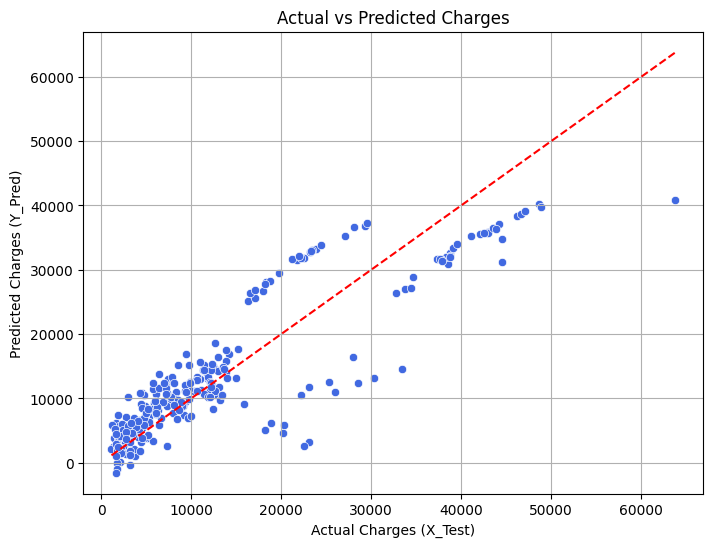

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Charges (X_Test)")
plt.ylabel("Predicted Charges (Y_Pred)")
plt.title("Actual vs Predicted Charges")
plt.grid(True)
plt.show()


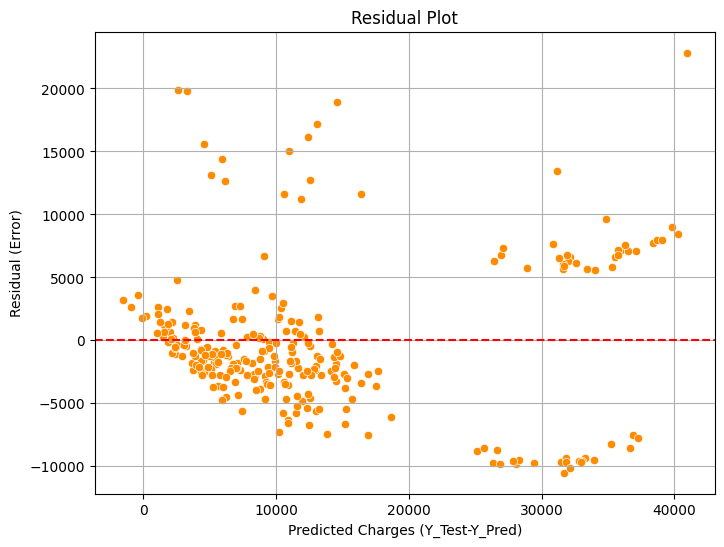

In [6]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='darkorange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges (Y_Test-Y_Pred)")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


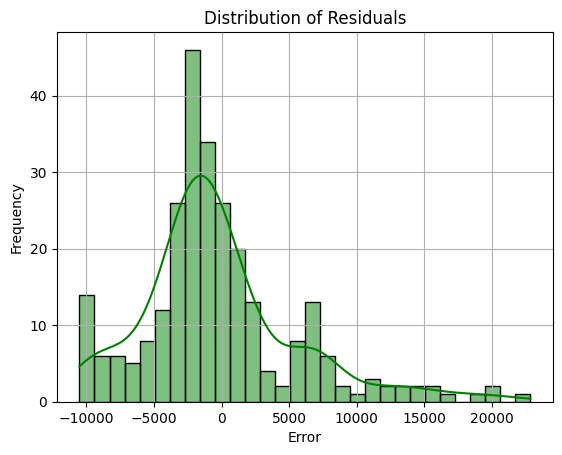

In [7]:
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
